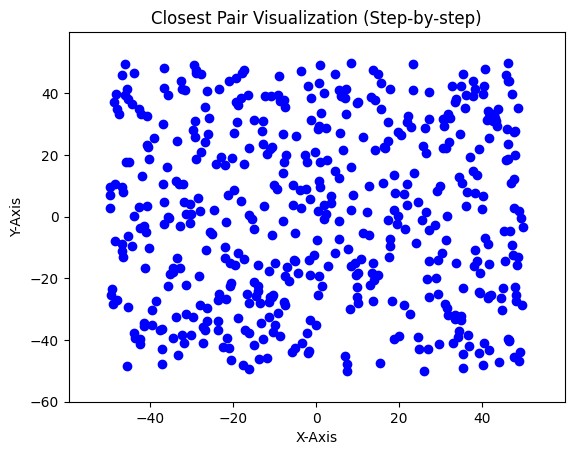

En Yakın Mesafe: 0.1414213562373109
En Yakın Noktalar: (6.1, 39.1) ve (6.2, 39.2)


In [9]:
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def calculate_distance(p1, p2):
    return math.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)


def read_points(file_path):
    points = []
    with open(file_path, 'r') as file:
        for line in file:
            x, y = map(float, line.strip().split())
            points.append(Point(x, y))
    return points


def brute_force_with_steps(points):
    comparisons = []  
    min_distance = float('inf')
    closest_points = None
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            dist = calculate_distance(points[i], points[j])
            comparisons.append((points[i], points[j])) 
            if dist < min_distance:
                min_distance = dist
                closest_points = (points[i], points[j])
    return min_distance, closest_points, comparisons


def visualize(points, closest_pair_result, comparisons):
    fig, ax = plt.subplots()
    ax.set_xlim(min(p.x for p in points) - 10, max(p.x for p in points) + 10)
    ax.set_ylim(min(p.y for p in points) - 10, max(p.y for p in points) + 10)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.title('Closest Pair Visualization (Step-by-step)')

   
    for point in points:
        ax.plot(point.x, point.y, 'bo')

   
    point_a_marker, = ax.plot([], [], 'ro', markersize=10) 
    point_b_marker, = ax.plot([], [], 'ro', markersize=10)  
    closest_line, = ax.plot([], [], 'r-', linewidth=2)     
    comparison_line, = ax.plot([], [], 'g-', linewidth=2)  


    current_closest_points = [None, None]  
    
    def update(frame):
        nonlocal current_closest_points
        if frame < len(comparisons):
            p1, p2 = comparisons[frame]
            
           
            point_a_marker.set_data([p1.x], [p1.y]) 
            point_b_marker.set_data([p2.x], [p2.y])  
            comparison_line.set_data([p1.x, p2.x], [p1.y, p2.y])  
            
           
            if current_closest_points[0] is None or calculate_distance(p1, p2) < calculate_distance(*current_closest_points):
                current_closest_points = (p1, p2)
        
        
        if current_closest_points[0] is not None:
            p1, p2 = current_closest_points
            closest_line.set_data([p1.x, p2.x], [p1.y, p2.y])  
        
        return point_a_marker, point_b_marker, closest_line, comparison_line

    ani = FuncAnimation(fig, update, frames=len(comparisons), interval=500, repeat=False)
    return ani 


file_path = 'C:/Users/90553/Desktop/algoritma ödevi/points_.txt'
points = read_points(file_path)

min_distance, closest_points, comparisons = brute_force_with_steps(points)


ani = visualize(points, (min_distance, closest_points), comparisons)


plt.show()

print(f"Closest Distance: {min_distance}")
if closest_points:
    print(f"Nearest Points: ({closest_points[0].x}, {closest_points[0].y}) and ({closest_points[1].x}, {closest_points[1].y})")
else:
    print("No pairs found.")
